In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Creating a small dataset
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'Feature2': [5, 4, 3, 2, 1, 5, 4, 3, 2, 1, 5, 4, 3, 2, 1],
    'Target': [0, 0, 2, 0, 0, 1, 1, 2, 1, 1, 0, 0, 2, 1, 1]
}

df = pd.DataFrame(data)

# Splitting the dataset into features (X) and target variable (y)
X = df[['Feature1', 'Feature2']]
y = df['Target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training a Logistic Regression model with multi_class='auto'
model = LogisticRegression(multi_class='auto', max_iter=1000)  # Added max_iter for convergence warning
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Calculating confusion matrix
cm = confusion_matrix(y_test, predictions)

# Displaying the dataset and confusion matrix
print("Dataset:")
print(df)
print("\nConfusion Matrix:")
print(cm)


Dataset:
    Feature1  Feature2  Target
0          1         5       0
1          2         4       0
2          3         3       2
3          4         2       0
4          5         1       0
5          6         5       1
6          7         4       1
7          8         3       2
8          9         2       1
9         10         1       1
10        11         5       0
11        12         4       0
12        13         3       2
13        14         2       1
14        15         1       1

Confusion Matrix:
[[1 1]
 [1 2]]


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Example dataset with 10 rows and 5 columns
X = np.array([
    [1.2, 2.3, 0.8, 4.1, 5.2],
    [0.5, 1.8, 2.0, 3.2, 2.9],
    [2.0, 1.0, 1.5, 5.0, 4.7],
    [1.8, 2.5, 0.7, 3.8, 6.2],
    [0.9, 1.5, 2.2, 4.5, 3.8],
    [1.5, 1.2, 1.9, 3.9, 4.0],
    [2.2, 2.8, 1.0, 4.8, 5.5],
    [1.0, 1.5, 2.5, 4.0, 3.2],
    [1.7, 2.0, 0.5, 3.5, 6.0],
    [2.5, 1.7, 1.2, 4.2, 4.9]
])

# Binary target variable 1
y1 = np.array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1])

# Multiclass target variable 2
y2 = np.array([2, 0, 1, 1, 0, 2, 1, 0, 2, 1])

# Split the dataset into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(
    X, y1, y2, test_size=0.2, random_state=42
)

# Create multi-output classifiers
classifier1 = RandomForestClassifier(random_state=42)
classifier2 = RandomForestClassifier(random_state=42)

multi_output_classifier = MultiOutputClassifier(
    estimators=[('classifier1', classifier1), ('classifier2', classifier2)]
)

# Fit the model
multi_output_classifier.fit(X_train, np.column_stack((y1_train, y2_train)))

# Make predictions
predictions = multi_output_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(np.column_stack((y1_test, y2_test)), predictions)
print(f"Accuracy: {accuracy:.2f}")

# Display example predictions and actual values
print("\nExample Predictions vs Actual Values:")
for i in range(len(X_test)):
    print(f"Sample {i + 1}: Predicted - {predictions[i]}, Actual - {np.column_stack((y1_test, y2_test))[i]}")



ValueError: Classification metrics can't handle a mix of multiclass-multioutput and multilabel-indicator targets

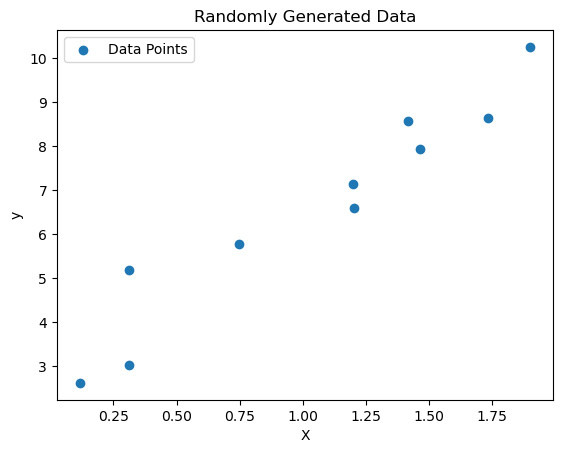

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(42)
X = 2 * np.random.rand(10, 1)
y = 4 + 3 * X + np.random.randn(10, 1)

# Plot the generated data
plt.scatter(X, y, label='Data Points')
plt.title('Randomly Generated Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [3]:
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516]])

In [8]:
np.ones((10, 1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [9]:
np.c_[np.ones((10, 1)), X]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516]])

In [12]:
theta = np.random.randn(2,1)
theta

array([[ 0.0675282 ],
       [-1.42474819]])